In [2]:
import pandas as pd
import os

# Definimos la ruta al archivo de datos
path_data = "../data/german_credit_data.csv"

# Cargamos los datos
df = pd.read_csv(path_data)

# Visualizamos las primeras 5 filas
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
# 1. Información general de los tipos de datos y valores no nulos
print("--- Información General ---")
df.info()

# 2. Conteo de valores faltantes (Nulos)
print("\n--- Valores Faltantes ---")
print(df.isnull().sum())

# 3. Resumen estadístico de las columnas numéricas
print("\n--- Resumen Estadístico ---")
df.describe()

--- Información General ---
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory u

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [5]:
# Creamos un diccionario con los nombres actuales y los nuevos
nombres_nuevos = {
    'laufzeit': 'duracion_meses',
    'hoehe': 'monto_credito',
    'alter': 'edad',
    'kredit': 'objetivo'
}

# Renombramos
df = df.rename(columns=nombres_nuevos)

# Verificamos el cambio
df[['duracion_meses', 'monto_credito', 'edad', 'objetivo']].head()

,duracion_meses,monto_credito,edad,objetivo
0,18,1049,21,1
1,9,2799,36,1
2,12,841,23,1
3,12,2122,39,1
4,12,2171,38,1


C:\Users\Victor\AppData\Local\Temp\ipykernel_1432\2173536699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='objetivo', data=df, palette='viridis')


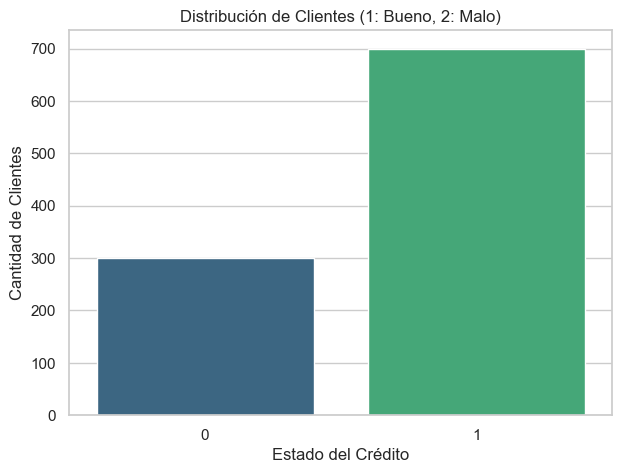

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Creamos un gráfico de barras para ver la distribución de buenos y malos pagadores
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='objetivo', data=df, palette='viridis')

# Añadimos títulos
plt.title('Distribución de Clientes (1: Bueno, 2: Malo)')
plt.xlabel('Estado del Crédito')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [7]:
# Esto nos dirá exactamente qué valores únicos tiene la columna
print(df['objetivo'].unique())

[1 0]


C:\Users\Victor\AppData\Local\Temp\ipykernel_1432\1235101153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='objetivo', data=df, palette='viridis')
C:\Users\Victor\AppData\Local\Temp\ipykernel_1432\1235101153.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Buen Pagador', 'Mal Pagador'])


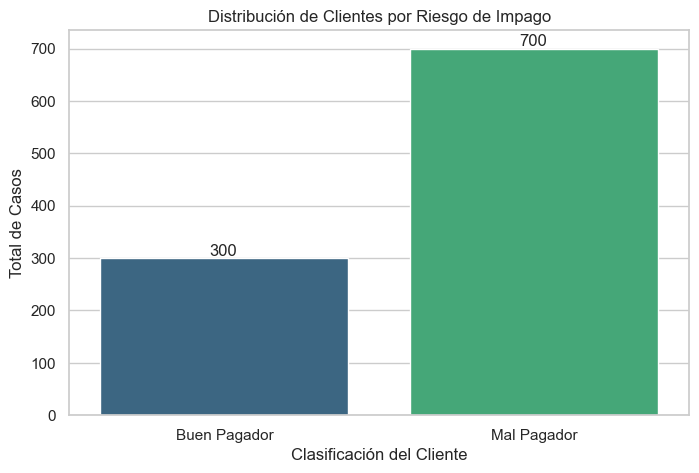

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='objetivo', data=df, palette='viridis')

# Definimos los nombres de las posiciones 0 y 1
ax.set_xticklabels(['Buen Pagador', 'Mal Pagador'])

# Añadimos claridad total
plt.title('Distribución de Clientes por Riesgo de Impago')
plt.xlabel('Clasificación del Cliente')
plt.ylabel('Total de Casos')

# Añadir los números encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 5))

plt.show()

C:\Users\Victor\AppData\Local\Temp\ipykernel_1432\659713719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='objetivo', y='edad', data=df, palette='viridis')


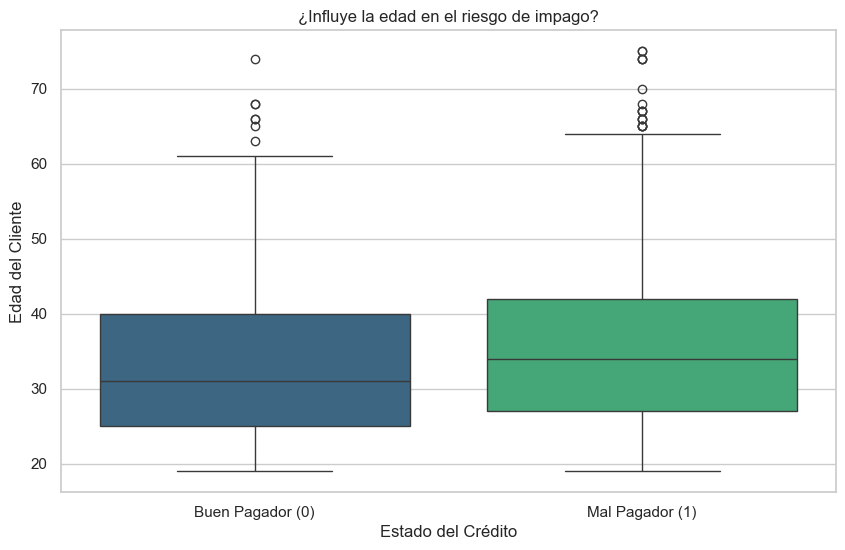

In [9]:
plt.figure(figsize=(10, 6))
# Usamos 'objetivo' que ya sabemos que tiene 0 y 1
sns.boxplot(x='objetivo', y='edad', data=df, palette='viridis')

# Personalizamos los ejes para no confundirnos
plt.xticks([0, 1], ['Buen Pagador (0)', 'Mal Pagador (1)'])
plt.title('¿Influye la edad en el riesgo de impago?')
plt.xlabel('Estado del Crédito')
plt.ylabel('Edad del Cliente')
plt.show()

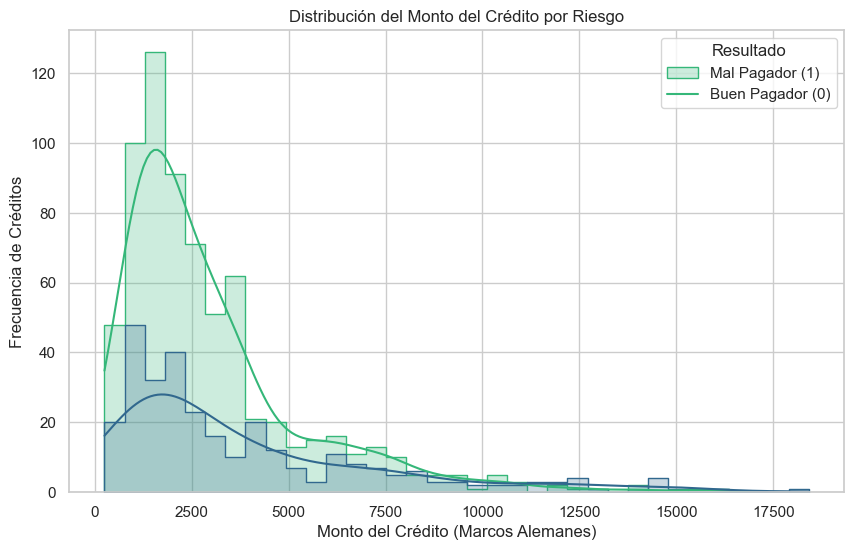

In [10]:
plt.figure(figsize=(10, 6))

# Creamos un histograma comparativo
sns.histplot(data=df, x='monto_credito', hue='objetivo', kde=True, palette='viridis', element='step')

# Mejoramos la legibilidad
plt.title('Distribución del Monto del Crédito por Riesgo')
plt.xlabel('Monto del Crédito (Marcos Alemanes)')
plt.ylabel('Frecuencia de Créditos')

# Cambiamos la leyenda para que sea clara
plt.legend(title='Resultado', labels=['Mal Pagador (1)', 'Buen Pagador (0)'])

plt.show()

C:\Users\Victor\AppData\Local\Temp\ipykernel_1432\1719418174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='objetivo', y='duracion_meses', data=df, palette='coolwarm', inner="quartile")


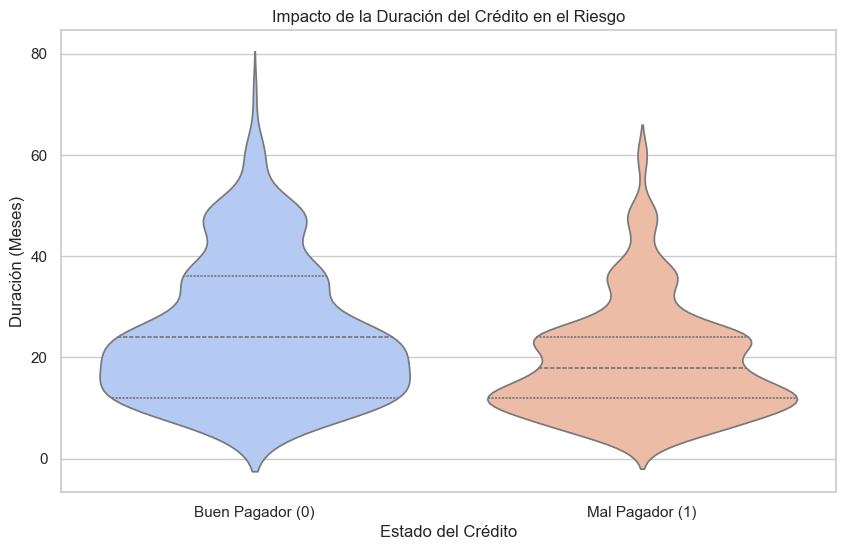

In [11]:
plt.figure(figsize=(10, 6))

# El Violin Plot nos muestra la distribución del tiempo para cada tipo de cliente
sns.violinplot(x='objetivo', y='duracion_meses', data=df, palette='coolwarm', inner="quartile")

# Personalización
plt.xticks([0, 1], ['Buen Pagador (0)', 'Mal Pagador (1)'])
plt.title('Impacto de la Duración del Crédito en el Riesgo')
plt.xlabel('Estado del Crédito')
plt.ylabel('Duración (Meses)')

plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Definimos nuestras variables de entrada (X) y lo que queremos predecir (y)
# Quitamos 'objetivo' y 'tag_riesgo' de X porque no queremos que la IA vea la respuesta
X = df.drop(['objetivo'], axis=1)
if 'tag_riesgo' in X.columns:
    X = X.drop(['tag_riesgo'], axis=1)

y = df['objetivo']

# Dividimos: 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Muestras para entrenamiento: {len(X_train)}")
print(f"Muestras para prueba: {len(X_test)}")

Muestras para entrenamiento: 800
Muestras para prueba: 200


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Instanciar el modelo (crear el objeto)
# Usamos 100 árboles (n_estimators)
modelo_bancario = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. ENTRENAMIENTO (Aquí es donde la IA estudia tus datos)
modelo_bancario.fit(X_train, y_train)

# 3. PREDICCIÓN (Le tomamos el examen con los datos que no conocía)
predicciones = modelo_bancario.predict(X_test)

print("¡Modelo entrenado con éxito!")

¡Modelo entrenado con éxito!


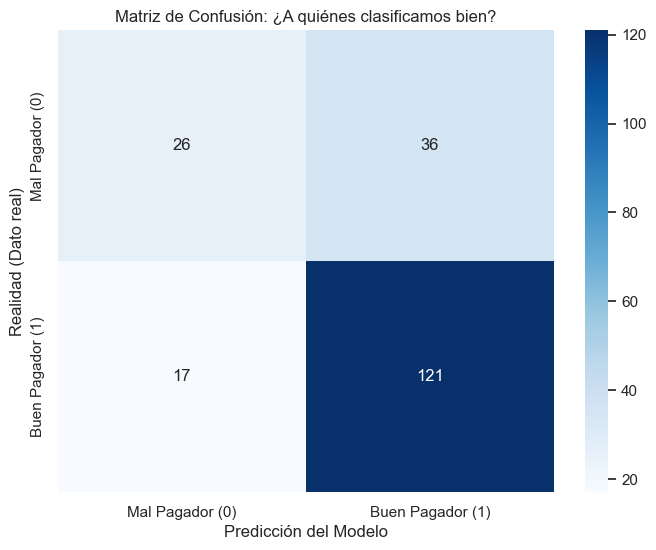

              precision    recall  f1-score   support

           0       0.60      0.42      0.50        62
           1       0.77      0.88      0.82       138

    accuracy                           0.73       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.72      0.73      0.72       200



In [ ]:
# Generamos la matriz de confusión para ver dónde se equivocó
cm = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Ajustamos las etiquetas según los resultados (1: Bueno, 0: Malo)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Dato real)')
plt.xticks([0.5, 1.5], ['Mal Pagador (0)', 'Buen Pagador (1)'])
plt.yticks([0.5, 1.5], ['Mal Pagador (0)', 'Buen Pagador (1)'])
plt.title('Matriz de Confusión: ¿A quiénes clasificamos bien?')
plt.show()

# Reporte detallado de precisión
print(classification_report(y_test, predicciones))